<a href="https://colab.research.google.com/github/xMORRICEx/CeubOS/blob/master/Classifica%C3%A7%C3%A3o_%C3%8Dris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos iniciar o desenvolvimento da árvore de decisão que classificará Iris.
Para isso, vamos carregar o arquivo texto iris.data para o python. Vamos utilizar o Pandas.

In [9]:
import pandas as pd
nomeColunas = ["alturaSepala", "larguraSepala", "alturaPetala", "larguraPetala", "classe"]
dataFrame = pd.read_csv("iris.data", names = nomeColunas)
print("Quantidade de linhas:", len(dataFrame))
print("Quantidade de colunas:", len(dataFrame.columns))

Quantidade de linhas: 150
Quantidade de colunas: 5


Uma vez que carregamos os dados do arquivo CSV para o dataFrame, vamos ver como ficou o dataFrame.

In [10]:
dataFrame.head()

,alturaSepala,larguraSepala,alturaPetala,larguraPetala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
dataFrame.tail()

,alturaSepala,larguraSepala,alturaPetala,larguraPetala,classe
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Vamos explorar um pouco mais do Pandas. Vamos pedir para o pandas mostrar quantos registros existem para cada tipo de Iris.

In [12]:
dataFrame["classe"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: classe, dtype: int64

Continuando o estudo para ver levemente o potencial do pandas, vamos pedir para ele nos mostrar o resultado acima em gráfico.

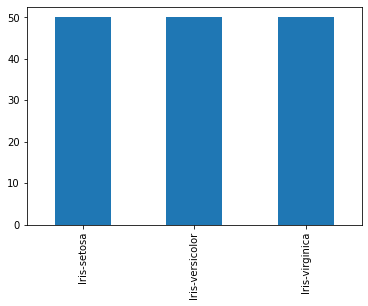

In [13]:
dataFrame["classe"].value_counts().plot(kind="bar")

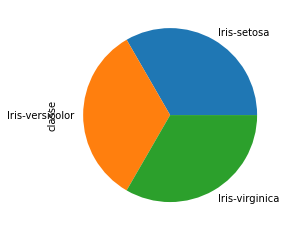

In [14]:
dataFrame["classe"].value_counts().plot(kind="pie")

Vamos continuar estudando o potencial do Pandas. Para isso, vamos utilizar funções que analisam valores numéricos. Veremos o máximo, o mínimo e a média.

In [15]:
print("Menor valor da coluna alturaSepala:", dataFrame["alturaSepala"].min())
print("Maior valor da coluna alturaSepala:", dataFrame["alturaSepala"].max())
print("A altura média das sépalas é:",dataFrame["alturaSepala"].mean())

Menor valor da coluna alturaSepala: 4.3
Maior valor da coluna alturaSepala: 7.9
A altura média das sépalas é: 5.843333333333335


Vamos criar duas colunas novas a apartir da combinação de colunas existentes. No caso, vamos criar as colunas "areaSepala" e "areaPetala".

In [16]:
dataFrame["areaSepala"] = dataFrame["alturaSepala"] * dataFrame["larguraSepala"]
dataFrame["areaPetala"] = dataFrame["alturaPetala"] * dataFrame["larguraPetala"]
dataFrame.head()

,alturaSepala,larguraSepala,alturaPetala,larguraPetala,classe,areaSepala,areaPetala
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28


Até aqui exploramos os dados com o pandas. Agora vamos iniciar a aplicação de conceitos típicos de IA.

In [17]:
variaveisIndependentes = dataFrame.columns.difference(["classe"], sort=False)
#variaveisIndependentes
X = dataFrame[variaveisIndependentes].values
y = dataFrame["classe"]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: classe, Length: 150, dtype: object

Uma vez que separamos as variáveis independentes da dependente, vamos iniciar a "magia". O primeiro é importar a biblioteca que contempla os algoritimos de IA.

In [18]:
from sklearn.tree import DecisionTreeClassifier

Uma vez que o componente que construirá a árvore foi importado, vamos criar um objeto que ficará responsável pela criação da árvore.

In [19]:
objClassificador = DecisionTreeClassifier(random_state=10, criterion="gini" ,max_depth=2)

Uma vez que o objeto que construirá a árvore de decisão foi criado, vamos partir para o treinamento (geração da árvore). NO sklearn, os treinamento ocorrem, normalmente, por meio da chamada da função fit()

In [20]:
objClassificador.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=10)

Agora que a árvore foi gerada, Vamos ver como ficou

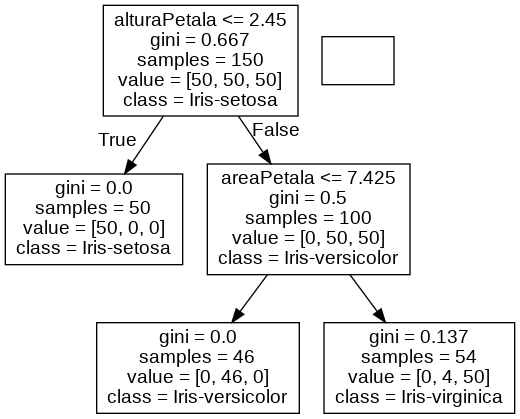

In [21]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(objClassificador, out_file=None, 
                                feature_names=variaveisIndependentes,  
                                class_names=dataFrame.classe.unique())

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

Uma vez que a árvore de decisão foi criada, vamos utilizá-la para previsão de Iris com medidas que ela nunca viu anteriormente.

In [23]:
iris1 = [5.1,3.5,1.4,0.2,17.85,0.28] #setosa
iris2 = [7.0, 3.2, 4.7,1.4,22.4,6.58] #versicolor
iris3 = [7.2,3.6,6.1,2.5,25.92,15.25] #virginica
iris4 = [5.0,2.4,1.8,0.2,12.0,0.36] #?????
conjuntoIris = pd.DataFrame([iris1,iris2,iris3,iris4],columns = variaveisIndependentes)
conjuntoIris
objClassificador.predict(conjuntoIris)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'],
      dtype=object)

Até o momento, utilizamos TODOS os 150 registros de Iris para o treinamento. No entanto, para evitar overfitting, vamos separar 10% dos registros para testar o modelo após o treinamento. O sklearn oferece um componente que faz essa separação, é o train_test_split.

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15)
print("Quantidade de registros separados para treinamento:",len(X_train))
print("Quantidade de registros separados para teste:", len(X_test))

Quantidade de registros separados para treinamento: 127
Quantidade de registros separados para teste: 23


Agora que estamos ficando Jedis na IA, vamos utilizar os registros de treinamento para treinar o modelo. Para isso, utilizaremos os valores de X_train e y_train

In [25]:
from sklearn.tree import DecisionTreeClassifier as dtc
objClassificador2 = dtc(criterion="entropy",max_depth=2)
objClassificador2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

Vamos ver como ficou a árvore gerada apenas com os dados de treinamento.

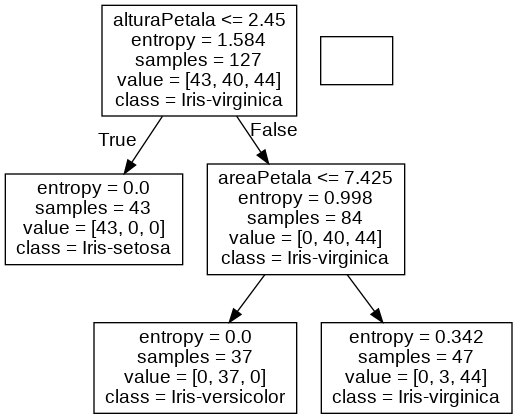

In [26]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(objClassificador2, out_file=None, 
                                feature_names=variaveisIndependentes,  
                                class_names=dataFrame.classe.unique())

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

Agora que a árvore foi gerada com os dados de treinamento, vamos ver a sua performance ao avaliar os dados separados para teste.

In [27]:
#print(X_test)
#print(y_test)
from sklearn.metrics import accuracy_score
y_pred = objClassificador2.predict(X_test)
precisao = accuracy_score(y_test,y_pred)
print("A acurácia do modelo foi:", precisao)

A acurácia do modelo foi: 0.9565217391304348
